In [1]:
import uproot
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from analysis import PandasAnalysis

In [2]:
babies = glob.glob("../analysis/studies/onelep/output/Run2/*.root")
babies

['../analysis/studies/onelep/output/Run2/TTX.root',
 '../analysis/studies/onelep/output/Run2/Bosons.root',
 '../analysis/studies/onelep/output/Run2/VHToNonbb.root',
 '../analysis/studies/onelep/output/Run2/TTbar2L.root',
 '../analysis/studies/onelep/output/Run2/WJets.root',
 '../analysis/studies/onelep/output/Run2/TTbar1L.root',
 '../analysis/studies/onelep/output/Run2/VBSWH_mkW.root']

In [3]:
vbswh = PandasAnalysis(
    sig_root_files=babies[-1:],
    bkg_root_files=babies[:-1],
    ttree_name="tree",
    weight_columns=["xsec_sf"]
)

In [30]:
def mini_sig_scan(variable, working_points, operator=">", base_sel=""):
    print("sel,sig,bkg")
    for wp in working_points:
        if base_sel:
            sel = f"{base_sel} and {variable} {operator} {wp}"
        else:
            sel = f"{variable} {operator} {wp}"
            
        sig, bkg = vbswh.get_event_counts(selection=sel)
        print(f"{sel},{sig},{bkg}")

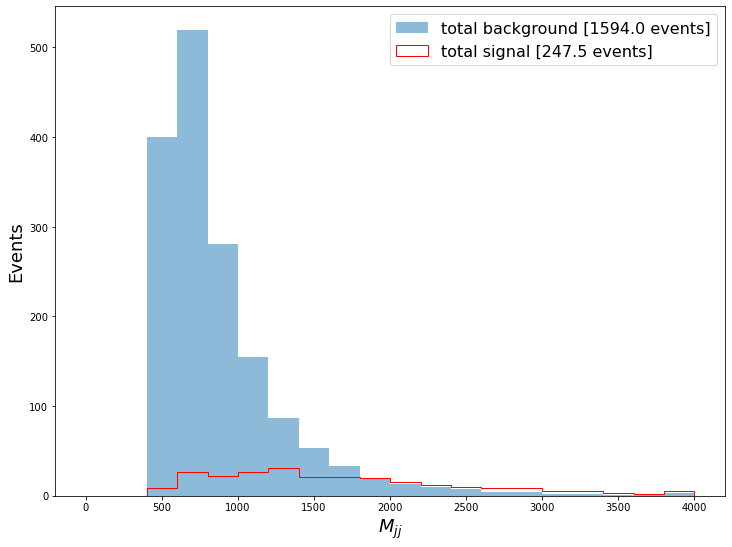

In [4]:
vbswh.plot_sig_vs_bkg("M_jj", np.linspace(0, 4000, 21), xlabel="$M_{jj}$")

In [31]:
mini_sig_scan("M_jj", [1000, 1500, 2000, 2500], operator=">", base_sel="")

sel,sig,bkg
M_jj > 1000,190.4052734375,393.4339599609375
M_jj > 1500,123.97196197509766,121.89542388916016
M_jj > 2000,73.38615417480469,45.69953918457031
M_jj > 2500,41.218753814697266,19.408668518066406


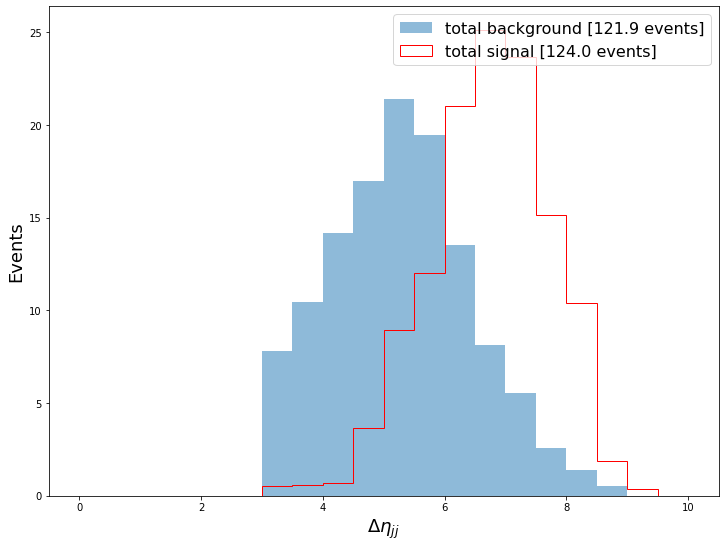

In [66]:
vbswh.plot_sig_vs_bkg(
    "deta_jj", np.linspace(0, 10, 21), 
    selection="M_jj > 1500", 
    xlabel="$\Delta\eta_{jj}$"
)

In [67]:
mini_sig_scan("deta_jj", [3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7], operator=">", base_sel="M_jj > 1500")

sel,sig,bkg
M_jj > 1500 and deta_jj > 3.5,123.4604721069336,114.06727600097656
M_jj > 1500 and deta_jj > 4,122.86447143554688,103.64875793457031
M_jj > 1500 and deta_jj > 4.5,122.17724609375,89.49498748779297
M_jj > 1500 and deta_jj > 5,118.53125,72.50226593017578
M_jj > 1500 and deta_jj > 5.5,109.60570526123047,51.130157470703125
M_jj > 1500 and deta_jj > 6,97.58218383789062,31.699237823486328
M_jj > 1500 and deta_jj > 6.5,76.55645751953125,18.160659790039062
M_jj > 1500 and deta_jj > 7,51.41848373413086,10.036223411560059


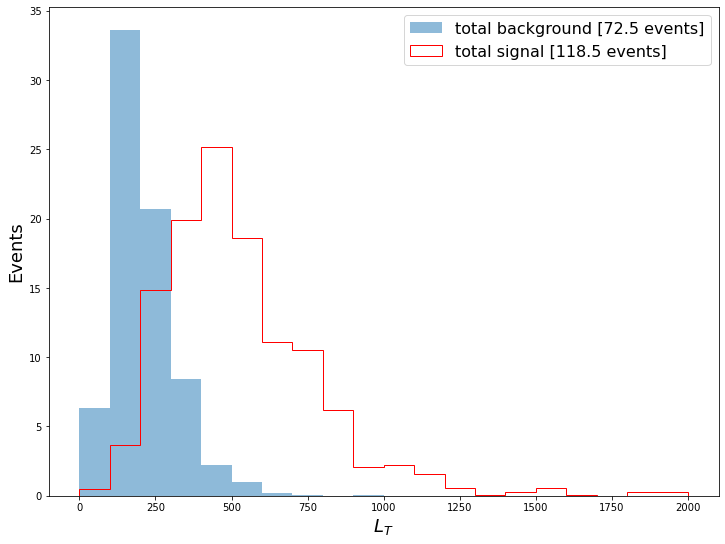

In [68]:
vbswh.plot_sig_vs_bkg("LT", np.linspace(0, 2000, 21), selection="M_jj > 1500 and deta_jj > 5", xlabel="$L_T$")

In [69]:
mini_sig_scan(
    "LT", [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], operator=">", 
    base_sel="M_jj > 1500 and deta_jj > 5"
)

sel,sig,bkg
M_jj > 1500 and deta_jj > 5 and LT > 100,118.01976013183594,66.1821517944336
M_jj > 1500 and deta_jj > 5 and LT > 200,114.37374877929688,32.569149017333984
M_jj > 1500 and deta_jj > 5 and LT > 300,99.5348892211914,11.910972595214844
M_jj > 1500 and deta_jj > 5 and LT > 400,79.62217712402344,3.506807565689087
M_jj > 1500 and deta_jj > 5 and LT > 500,54.48102569580078,1.2791767120361328
M_jj > 1500 and deta_jj > 5 and LT > 600,35.901451110839844,0.292368084192276
M_jj > 1500 and deta_jj > 5 and LT > 700,24.829742431640625,0.10519051551818848
M_jj > 1500 and deta_jj > 5 and LT > 800,14.285236358642578,0.05930241197347641
M_jj > 1500 and deta_jj > 5 and LT > 900,8.072785377502441,0.04860939458012581
M_jj > 1500 and deta_jj > 5 and LT > 1000,5.961221694946289,0.0006212657317519188


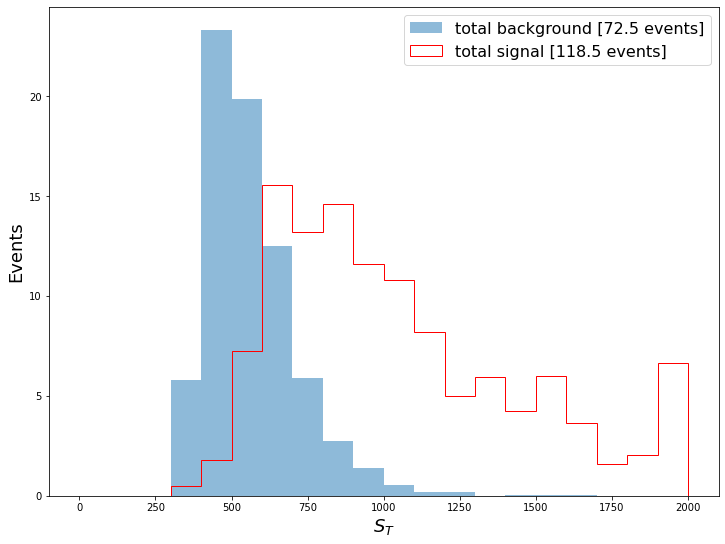

In [42]:
vbswh.plot_sig_vs_bkg("ST", np.linspace(0, 2000, 21), selection="M_jj > 1500 and deta_jj > 5", xlabel="$S_T$")

In [52]:
mini_sig_scan(
    "ST", [1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900], operator=">", 
    base_sel="M_jj > 1500 and deta_jj > 5"
)

sel,sig,bkg
M_jj > 1500 and deta_jj > 5 and ST > 1000,54.13072967529297,1.099375605583191
M_jj > 1500 and deta_jj > 5 and ST > 1100,43.325965881347656,0.5838701725006104
M_jj > 1500 and deta_jj > 5 and ST > 1200,35.121856689453125,0.3699599504470825
M_jj > 1500 and deta_jj > 5 and ST > 1300,30.114788055419922,0.17322269082069397
M_jj > 1500 and deta_jj > 5 and ST > 1400,24.14921760559082,0.16289658844470978
M_jj > 1500 and deta_jj > 5 and ST > 1500,19.89934539794922,0.11468665301799774
M_jj > 1500 and deta_jj > 5 and ST > 1600,13.929426193237305,0.055317655205726624
M_jj > 1500 and deta_jj > 5 and ST > 1700,10.275558471679688,0.0006212657317519188
M_jj > 1500 and deta_jj > 5 and ST > 1800,8.668790817260742,0.0002569321950431913
M_jj > 1500 and deta_jj > 5 and ST > 1900,6.62169075012207,0.0002569321950431913


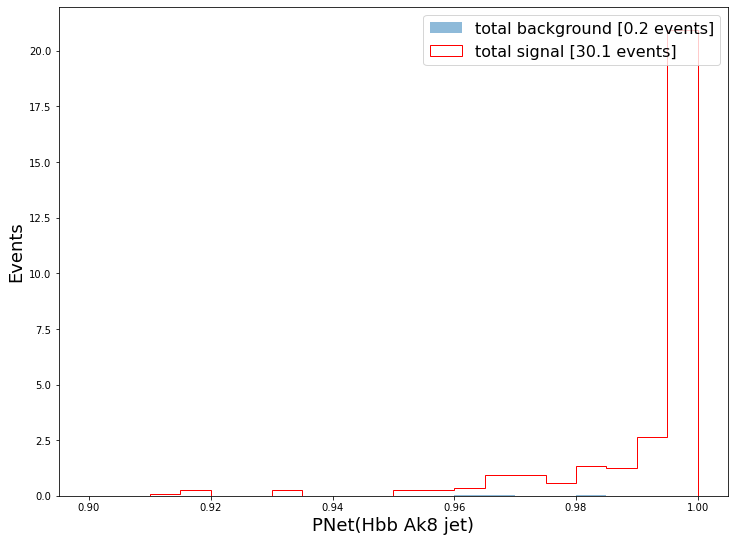

In [72]:
vbswh.plot_sig_vs_bkg(
    "hbbjet_score", np.linspace(0.9, 1.0, 21), 
    selection="M_jj > 1500 and deta_jj > 5 and ST > 1300", 
    xlabel="PNet(Hbb Ak8 jet)"
)

In [73]:
mini_sig_scan(
    "hbbjet_score", np.linspace(0.91, 0.99, 9), operator=">", 
    base_sel="M_jj > 1500 and deta_jj > 5 and ST > 1300"
)

sel,sig,bkg
M_jj > 1500 and deta_jj > 5 and ST > 1300 and hbbjet_score > 0.91,30.114788055419922,0.17322269082069397
M_jj > 1500 and deta_jj > 5 and ST > 1300 and hbbjet_score > 0.92,29.771181106567383,0.17134055495262146
M_jj > 1500 and deta_jj > 5 and ST > 1300 and hbbjet_score > 0.93,29.771181106567383,0.16101445257663727
M_jj > 1500 and deta_jj > 5 and ST > 1300 and hbbjet_score > 0.9400000000000001,29.518783569335938,0.15052320063114166
M_jj > 1500 and deta_jj > 5 and ST > 1300 and hbbjet_score > 0.95,29.518783569335938,0.15052320063114166
M_jj > 1500 and deta_jj > 5 and ST > 1300 and hbbjet_score > 0.96,29.007299423217773,0.15030139684677124
M_jj > 1500 and deta_jj > 5 and ST > 1300 and hbbjet_score > 0.97,27.73076820373535,0.04564008116722107
M_jj > 1500 and deta_jj > 5 and ST > 1300 and hbbjet_score > 0.98,26.20183563232422,0.04564008116722107
M_jj > 1500 and deta_jj > 5 and ST > 1300 and hbbjet_score > 0.99,23.577619552612305,0.0005887345178052783
